В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import  matplotlib.pyplot as plt
import seaborn as sns

# 1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
fetch_california_housing=datasets.fetch_california_housing()

In [ ]:
print(fetch_california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data = pd.DataFrame(fetch_california_housing.data, columns=fetch_california_housing.feature_names)
data['MedHouseVal'] = fetch_california_housing.target
data.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


# 2.Проведите первичный анализ. a.Проверьте данные на пропуски. Удалите в случае обнаружения. b.*Нормализуйте один из признаков.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Выбросов нет.

Поскольку все признаки должны быть равны в возможностях своего влияния, выбираю для нормализации признак 'Population' (у него самый большой диапазон значений: min=3, max=35682)

In [ ]:
PopulationArray = np.array(data['Population'])
PopulationArray = preprocessing.normalize([PopulationArray])

In [ ]:
data['Population'] = PopulationArray[0]

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.001231,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.009180,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.001896,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.002133,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.002160,2.181467,37.85,-122.25,3.422


# 3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
X = data[data.columns[:-1]]
Y = data['MedHouseVal']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

# 4.Обучите модель регрессии на обучающем множестве.

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([ 0.43333341,  0.00929324, -0.09864337,  0.59321549, -1.97783094,
        -0.00474516, -0.42144934, -0.43416604]), -36.85856910680135)

# 5.Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [ ]:
pred=model.predict(X_test)

In [ ]:
model.score(X_test, Y_test)

0.5943232652466199

Выведем рядом истинные значения целевой переменной и предсказанные моделью значения стоимости дома.

In [ ]:
pred_data = pd.DataFrame({
    'true': Y_test,
    'prediction': pred
})

pred_data[:5]

,true,prediction
14740,1.369,2.281107
10101,2.413,2.790091
20566,2.007,1.903328
2670,0.725,1.017603
15709,4.600,2.948524


In [ ]:
pred_data['difference, $100K'] = pred_data['prediction'] - pred_data['true']
pred_data[:5]

,true,prediction,"difference, $100K"
14740,1.369,2.281107,0.912107
10101,2.413,2.790091,0.377091
20566,2.007,1.903328,-0.103672
2670,0.725,1.017603,0.292603
15709,4.600,2.948524,-1.651476


In [ ]:
rmse_test = np.sqrt(mean_squared_error(Y_test, pred))
rmse_test # значение метрики плохое, в идеале стремится к 0)

0.7273129773603116

# 6.Обучите дерево решений на обучающем множестве.

In [ ]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

## a.Повторите п. 5 для полученной модели.

In [ ]:
pred_tree=tree.predict(X_test)

In [ ]:
tree.score(X_test, Y_test)

0.5848779773069206

In [ ]:
print(f'Точность для модели регрессии {model.score(X_test, Y_test):.5f}')
print(f'Точность для дерева решений {tree.score(X_test, Y_test):.5f}')
# коэффициент детерминации у дерева получился чуть хуже (в идеале равен 1)

Точность для модели регрессии 0.59432
Точность для дерева решений 0.58488


## b.Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.

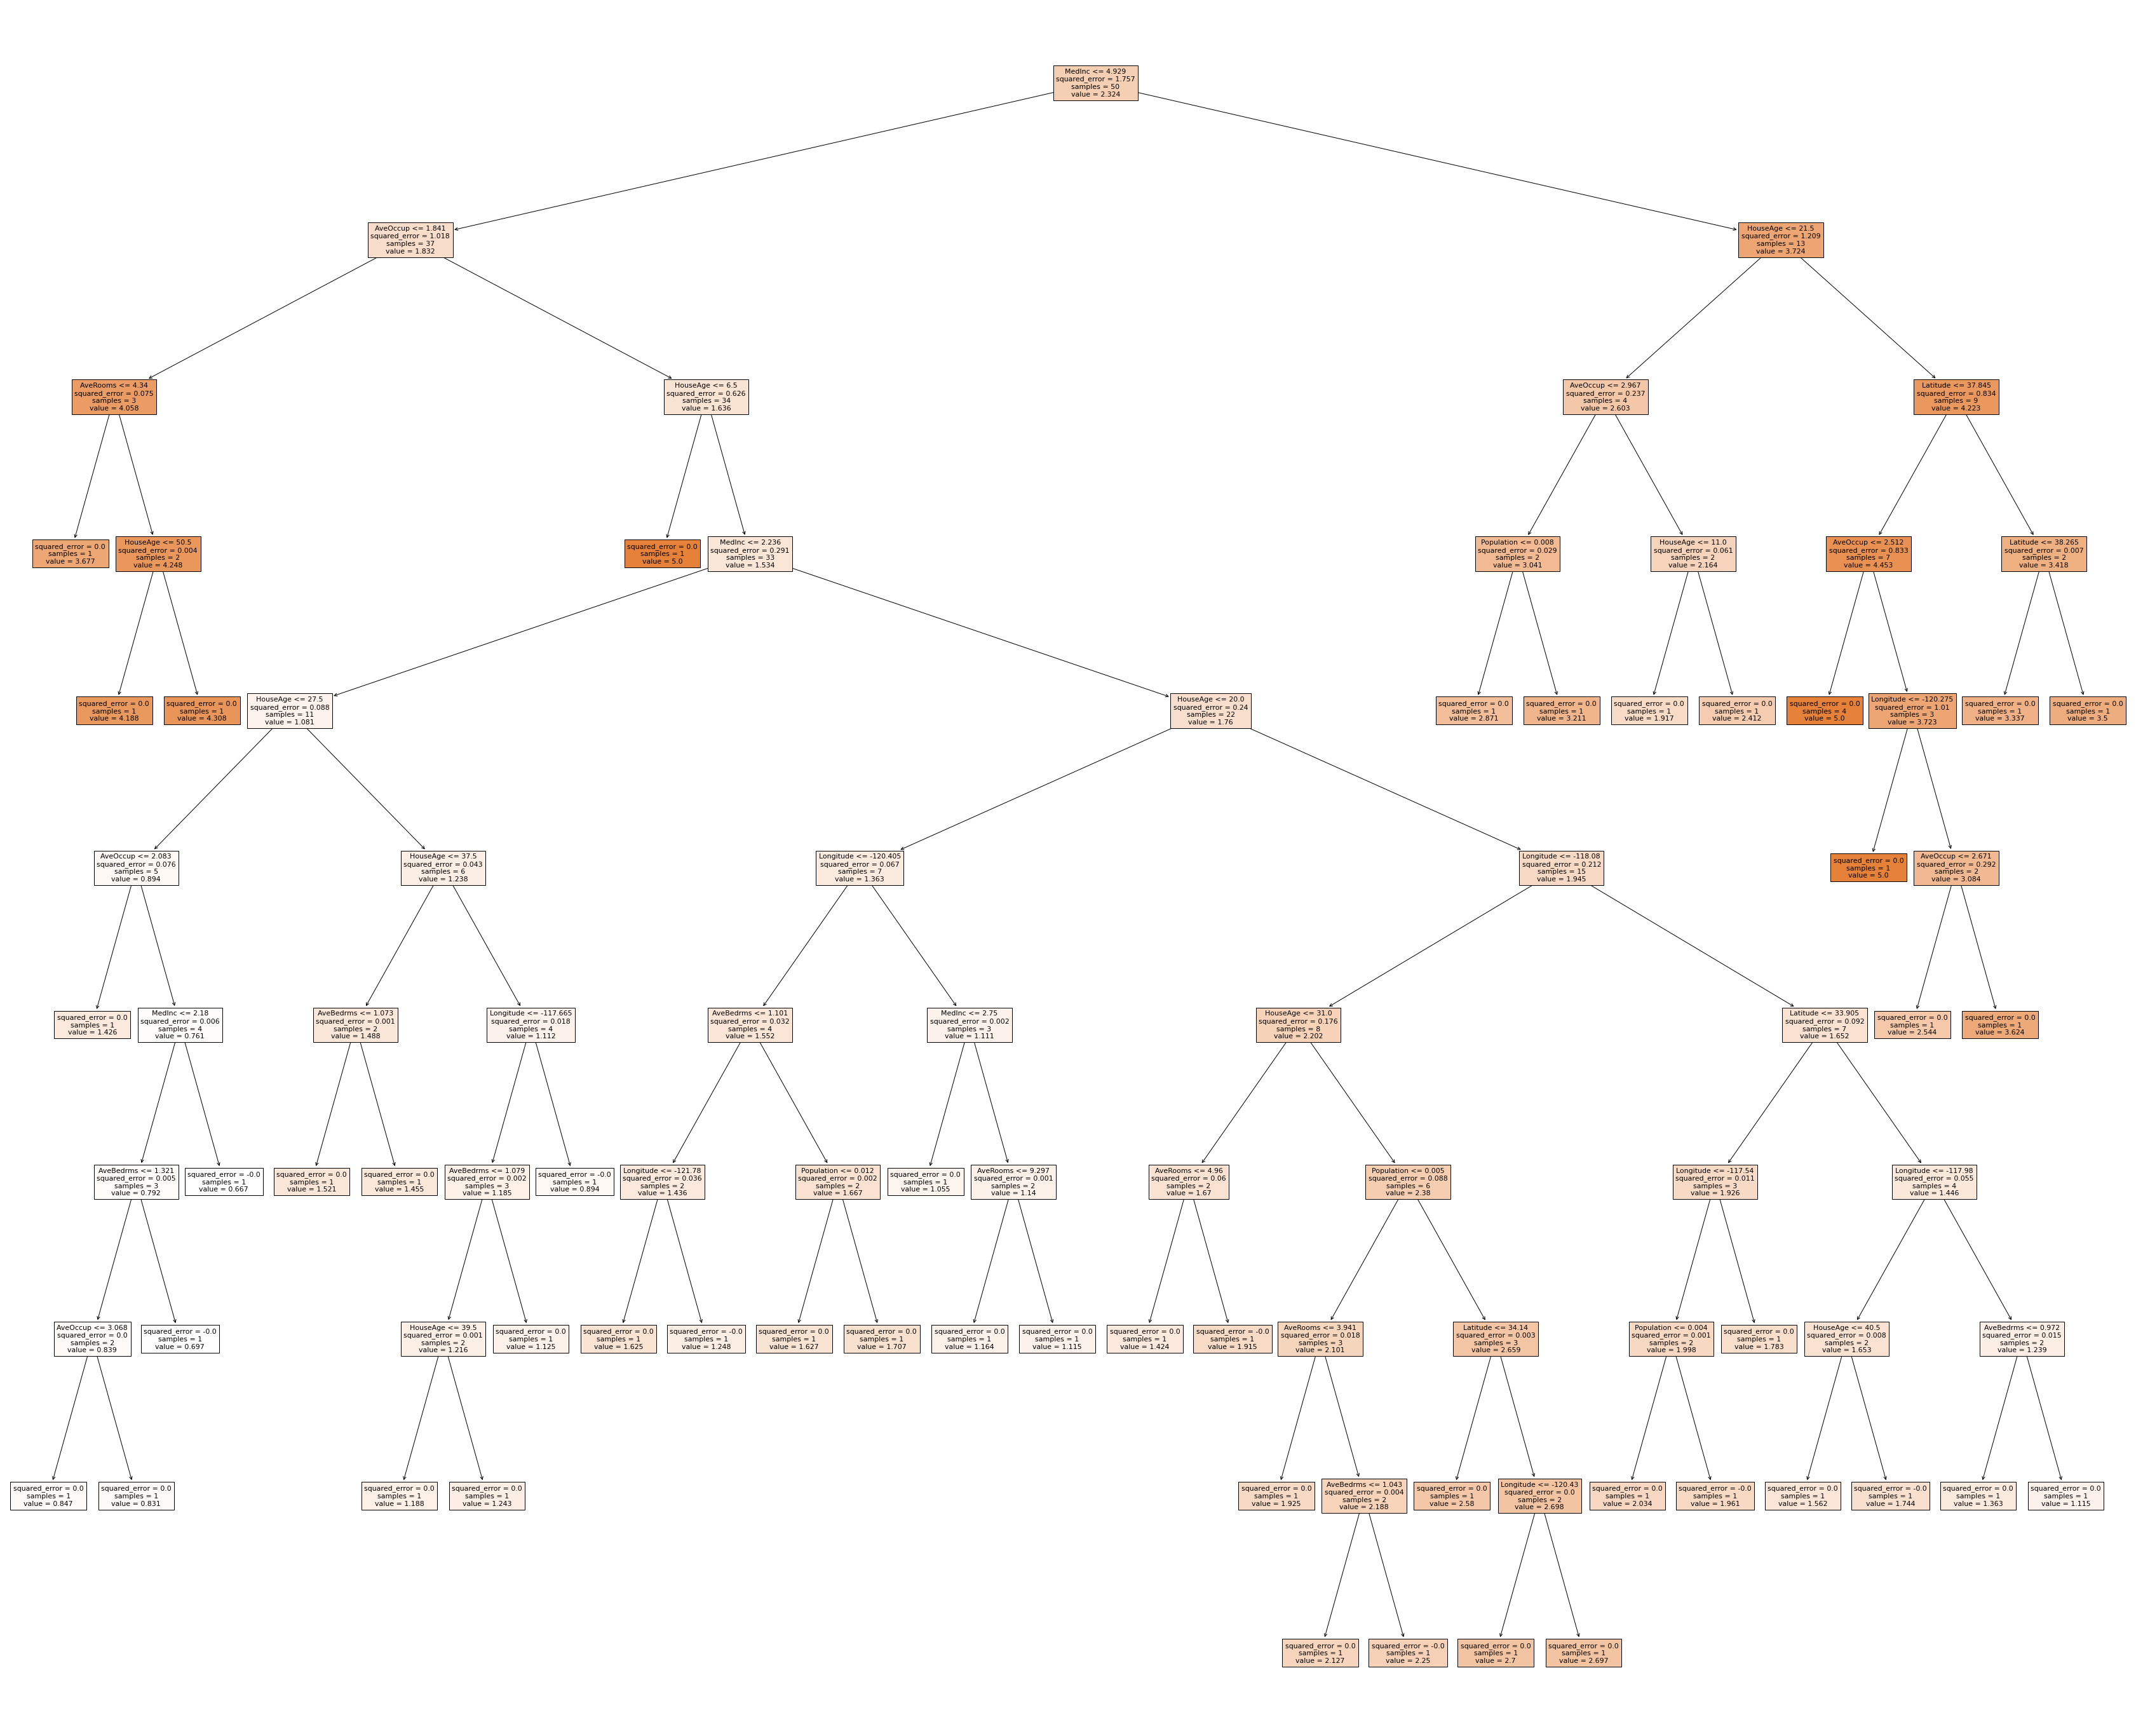

In [ ]:
plt.figure(figsize=(60, 50))
plot_tree(tree.fit(X_train[:50], Y_train[:50]), feature_names=fetch_california_housing.feature_names, filled=True);

In [ ]:
# число листьев дерева, высота дерева (для визуализированной части дерева)
(tree.fit(X_train[:50], Y_train[:50])).get_n_leaves(), (tree.fit(X_train[:50], Y_train[:50])).get_depth()

(47, 10)

In [ ]:
(tree.fit(X_train, Y_train)).get_n_leaves(), (tree.fit(X_train, Y_train)).get_depth() # число листьев дерева, высота дерева (для полного дерева)

(15837, 33)

# 7.Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор. a. Повторите п. 5 для полученной модели.

In [ ]:
# Fit regression model
list_depth = list(range(1,34))
dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i).fit(X_train, Y_train)

In [ ]:
# Predict
pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)
      print(key,cur_dt_reg.score(X_train,Y_train), cur_dt_reg.score(X_test,Y_test))

depth=1 0.3158971816089652 0.28435269551125275
depth=2 0.4541232468548029 0.41804304179139584
depth=3 0.5424303050289929 0.498976579243402
depth=4 0.5918590280956719 0.5422062695485083
depth=5 0.6379743000688516 0.5857247671583736
depth=6 0.6767779728861284 0.6182233816773537
depth=7 0.7139939479232886 0.6465722768845552
depth=8 0.7547489702596479 0.6592699844026835
depth=9 0.79374675807113 0.6665098174143311
depth=10 0.8311619755374754 0.6538649656706125
depth=11 0.866845804165612 0.6577337472316993
depth=12 0.8979189644101371 0.6514824641892072
depth=13 0.9252244903797916 0.6504612705946752
depth=14 0.9482840061561781 0.6294786461305104
depth=15 0.9653006615067973 0.6160515995176297
depth=16 0.9772241723273625 0.6104751011034695
depth=17 0.9852890922536645 0.604014338769049
depth=18 0.99070685135102 0.5821801631862221
depth=19 0.9943947383783299 0.5922645520790489
depth=20 0.9965955631364899 0.5949467597848378
depth=21 0.9979565636742723 0.5930839163676138
depth=22 0.9987352222207821

Оптимизируем глубину дерева до depth=9.

Далее будем оптимизировать минимальное количество объектов в одном листе.

In [ ]:
# Fit regression model
list_min_samples_leaf=list(range(1,50,3))
dt_regs = {}
for i in list_min_samples_leaf:
    dt_regs[f'min_samples_leaf={i}'] = DecisionTreeRegressor(max_depth=9, min_samples_leaf=i).fit(X_train, Y_train)

In [ ]:
# Predict
pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)
      print(key,cur_dt_reg.score(X_train,Y_train), cur_dt_reg.score(X_test,Y_test))

min_samples_leaf=1 0.79374675807113 0.6714713088872343
min_samples_leaf=4 0.7877917841151771 0.6806545035361049
min_samples_leaf=7 0.7828582010598829 0.690706495633107
min_samples_leaf=10 0.7781702112035673 0.6962077005137866
min_samples_leaf=13 0.7747441914324972 0.6912076324351994
min_samples_leaf=16 0.7717739027485797 0.6910353139146864
min_samples_leaf=19 0.7690461206772695 0.6958854661559403
min_samples_leaf=22 0.7639986067782747 0.6939635406311274
min_samples_leaf=25 0.7605430280971717 0.6945079609060953
min_samples_leaf=28 0.757032032172481 0.6939691437697134
min_samples_leaf=31 0.7559891035348265 0.6912537798636604
min_samples_leaf=34 0.7536072748607019 0.6908471301938861
min_samples_leaf=37 0.7522967251147809 0.6901213350094076
min_samples_leaf=40 0.7483928810903897 0.6872309396324594
min_samples_leaf=43 0.7469852286975731 0.6873870823567325
min_samples_leaf=46 0.7437932674540676 0.6844067393739105
min_samples_leaf=49 0.7405121999261493 0.6782173681362605


In [ ]:
# Fit regression model
list_min_samples_leaf=list(range(7,13))
dt_regs = {}
for i in list_min_samples_leaf:
    dt_regs[f'min_samples_leaf={i}'] = DecisionTreeRegressor(max_depth=9, min_samples_leaf=i).fit(X_train, Y_train)

In [ ]:
# Predict
pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)
      print(key,cur_dt_reg.score(X_train,Y_train), cur_dt_reg.score(X_test,Y_test))

min_samples_leaf=7 0.7828582010598829 0.6907696456875985
min_samples_leaf=8 0.7817306511588723 0.6939023017485857
min_samples_leaf=9 0.7804255443340246 0.6952029027039988
min_samples_leaf=10 0.7781702112035673 0.6962077005137866
min_samples_leaf=11 0.7775147549109926 0.6969713657439616
min_samples_leaf=12 0.7762735637377685 0.6955298448044884


Оптимизируем минимальное количество объектов в одном листе до 11.

In [ ]:
tree_res = DecisionTreeRegressor(random_state=1,
                             max_depth=9,
                             min_samples_leaf=11)
tree_res.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=11, random_state=1)

In [ ]:
tree_res.get_n_leaves(), tree_res.get_depth()

(318, 9)

In [ ]:
pred_tree_res=tree_res.predict(X_test)

In [ ]:
tree_res.score(X_test, Y_test)

0.6969713657439616

# 8.Сформулируйте выводы по проделанной работе. a. Сравните точность двух моделей. b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [ ]:
print(f'Точность для модели регрессии {model.score(X_test, Y_test):.5f}')
print(f'Точность для дерева решений {tree.score(X_test, Y_test):.5f}')
print(f'Точность для оптимизированного дерева решений {tree_res.score(X_test, Y_test):.5f}')
# самый хороший коэффициент детерминации получился у оптимизированного дерева (в идеале равен 1)

Точность для модели регрессии 0.59432
Точность для дерева решений 0.58488
Точность для оптимизированного дерева решений 0.69697


В использованном датасете оптимизированное дерево решений показало лучший результат, чем линейная регрессия. Модель регрессии построена на необработанных данных.

Дерево решений удобно использовать, когда исследуемая предметная модель плохо изучена и сложно делать обоснованные  предположения. Дерево позволяет на основе простого выбора ответов на простые вопросы к параметрам построить модель. Также оно позволяет смешивать категориальные и числовые признаки.

Дерево решений удобно применять когда нужно быстро получить удовлетворительную модель, когда нет времени на обработку данных или в трудно формализуемых задачах.
